# Geração de Gráficos Mensais e Automação de Análises

Este notebook tem como objetivo gerar gráficos referentes aos meses de **março, abril, maio, junho e dezembro**, utilizando bases de dados previamente salvas.

Ao final, também será apresentada uma forma de **automatizar** esse processo para facilitar a geração de gráficos nos próximos meses ou anos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurações de exibição
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)

In [3]:
# Caminho onde os arquivos estão armazenados
caminho_dados = r"C:\Users\brunn\OneDrive\Área de Trabalho\EBAC\input"

# Lista dos meses de interesse
meses = ["MAR", "ABR", "MAI", "JUN", "DEZ"]

# Nome base dos arquivos
nome_base = "SINASC_RO_2019_"

# Dicionário para armazenar as bases
bases = {}

In [18]:
for mes in meses:
    arquivo = os.path.join(caminho_dados, f"{nome_base}{mes}.csv")
    if os.path.exists(arquivo):
        bases[mes] = pd.read_csv(arquivo, sep=';', encoding='latin1')
        print(f"Arquivo {mes} carregado com sucesso! ({bases[mes].shape[0]} linhas)")
    else:
        print(f"Arquivo {mes} não encontrado.")

Arquivo MAR carregado com sucesso! (6844 linhas)
Arquivo ABR carregado com sucesso! (9217 linhas)
Arquivo MAI carregado com sucesso! (11582 linhas)
Arquivo JUN carregado com sucesso! (13758 linhas)
Arquivo DEZ carregado com sucesso! (27028 linhas)


In [5]:
# Exemplo: mostrar as primeiras linhas do mês de maio
bases["MAI"].head()

,"IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI"
0,"19,Masculino,9.0,10.0,3685,4,2019-02-19,37 a 4..."
1,"29,Feminino,8.0,9.0,3055,4,2019-02-21,37 a 41 ..."
2,"37,Feminino,8.0,10.0,3460,4,2019-02-25,37 a 41..."
3,"30,Feminino,9.0,10.0,2982,3,2019-03-20,37 a 41..."
4,"30,Feminino,8.0,10.0,3310,4,2019-03-23,37 a 41..."


In [10]:
# Exibe as colunas disponíveis em um dos DataFrames
for mes, df in bases.items():
    print(f"\nColunas disponíveis no arquivo {mes}:")
    print(df.columns.tolist())
    break  # remove o break se quiser ver de todos os meses


Colunas disponíveis no arquivo MAR:
['IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI']


In [12]:
for mes in meses:
    arquivo = os.path.join(caminho_dados, f"{nome_base}{mes}.csv")
    if os.path.exists(arquivo):
        # Aqui ajuseti o separador e a codificação
        df = pd.read_csv(arquivo, sep=',', encoding='latin1')
        
        # Padroniza nomes das colunas (sem espaços e tudo maiúsculo)
        df.columns = df.columns.str.upper().str.replace(" ", "")
        
        bases[mes] = df
        print(f"Arquivo {mes} carregado com sucesso! ({df.shape[0]} linhas, {df.shape[1]} colunas)")
    else:
        print(f"Arquivo {mes} não encontrado.")

Arquivo MAR carregado com sucesso! (6844 linhas, 11 colunas)
Arquivo ABR carregado com sucesso! (9217 linhas, 11 colunas)
Arquivo MAI carregado com sucesso! (11582 linhas, 11 colunas)
Arquivo JUN carregado com sucesso! (13758 linhas, 11 colunas)
Arquivo DEZ carregado com sucesso! (27028 linhas, 11 colunas)


In [13]:
print("Colunas do arquivo de MAR:")
print(bases["MAR"].columns.tolist())

Colunas do arquivo de MAR:
['IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'DTNASC', 'GESTACAO', 'GRAVIDEZ', 'ESCMAE', 'IDADEPAI']


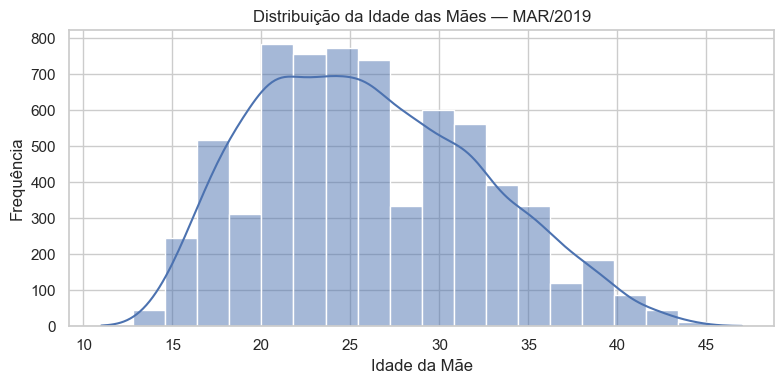

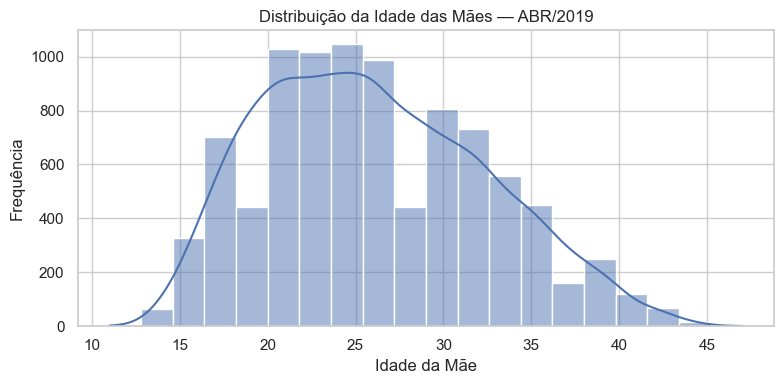

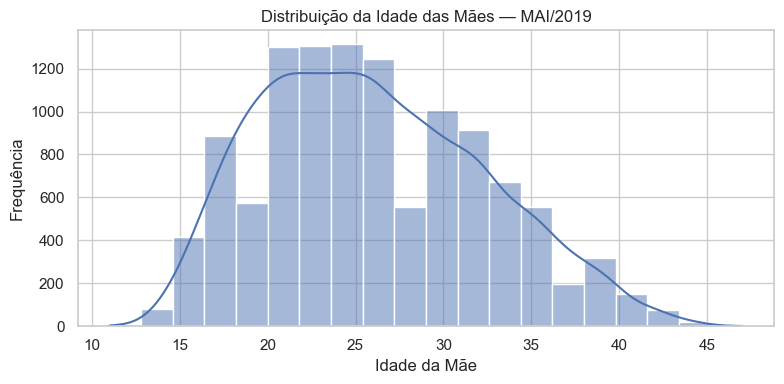

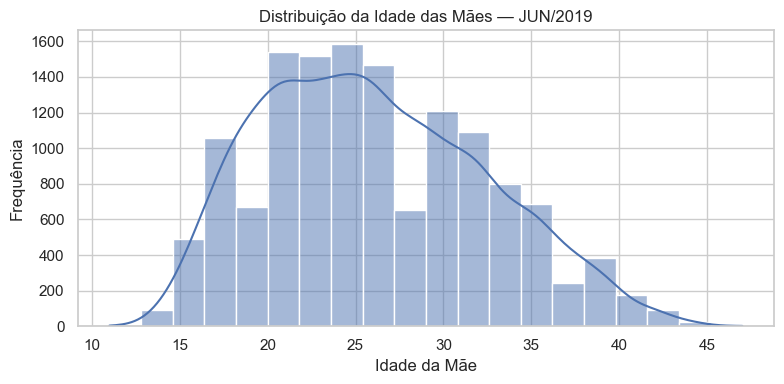

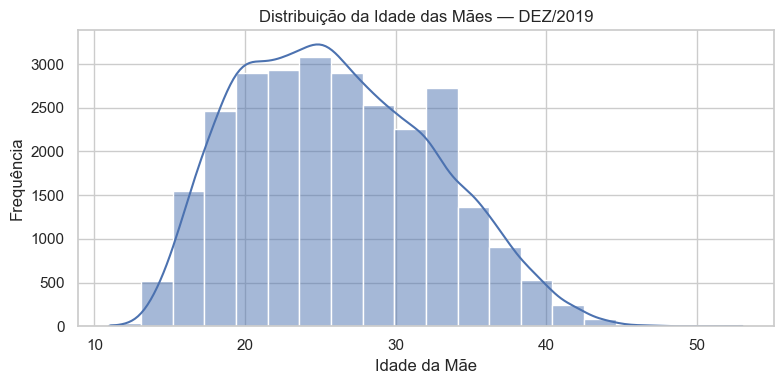

In [14]:
# Gráfico da distribuição da idade das mães
for mes, df in bases.items():
    plt.figure()
    sns.histplot(df["IDADEMAE"], bins=20, kde=True)
    plt.title(f"Distribuição da Idade das Mães — {mes}/2019")
    plt.xlabel("Idade da Mãe")
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()

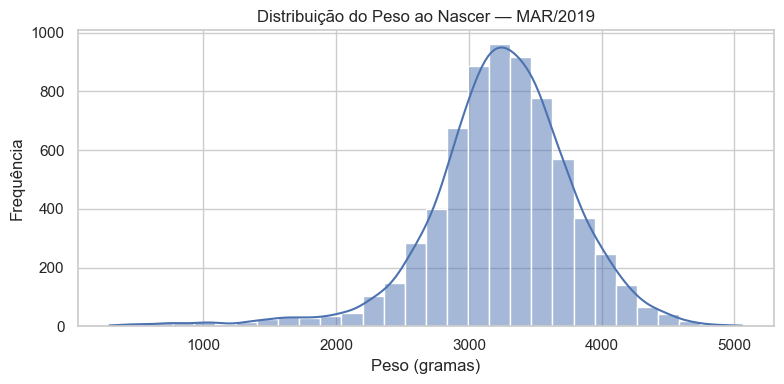

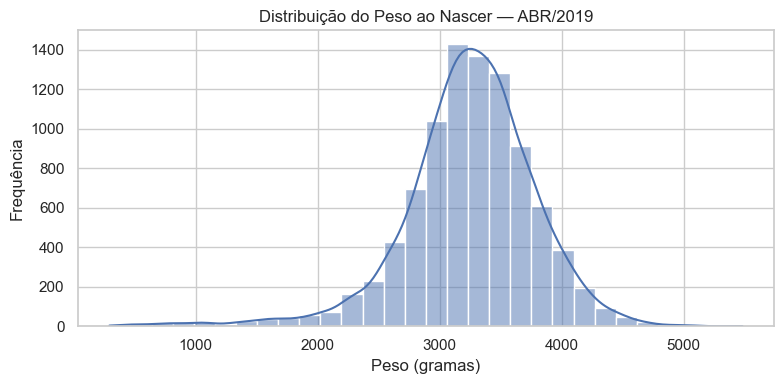

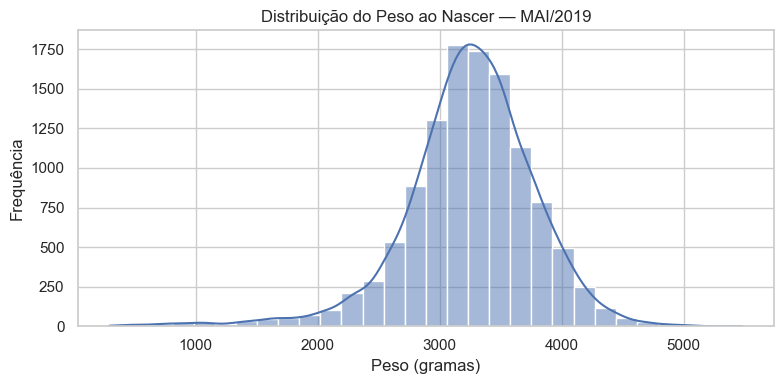

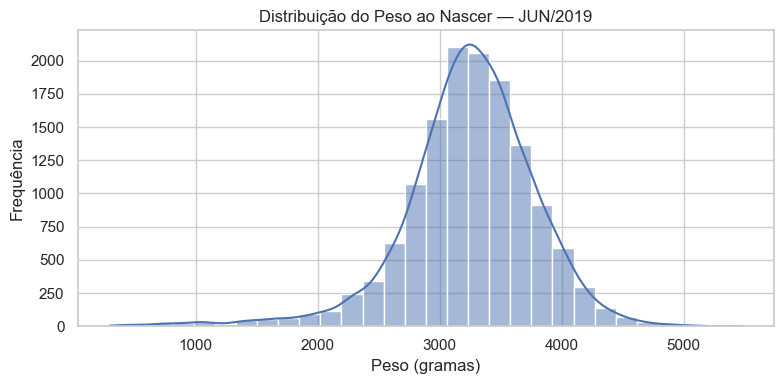

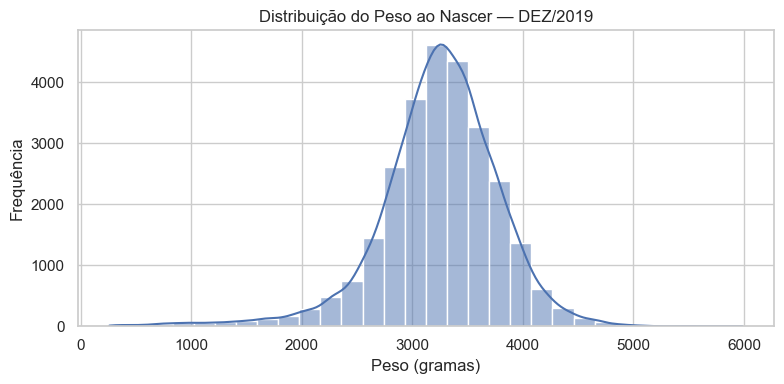

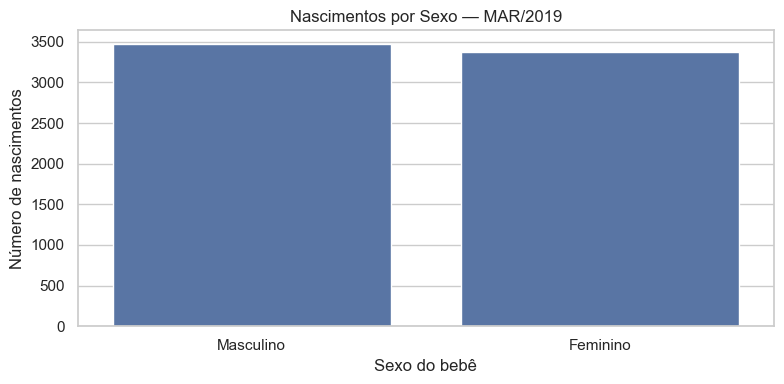

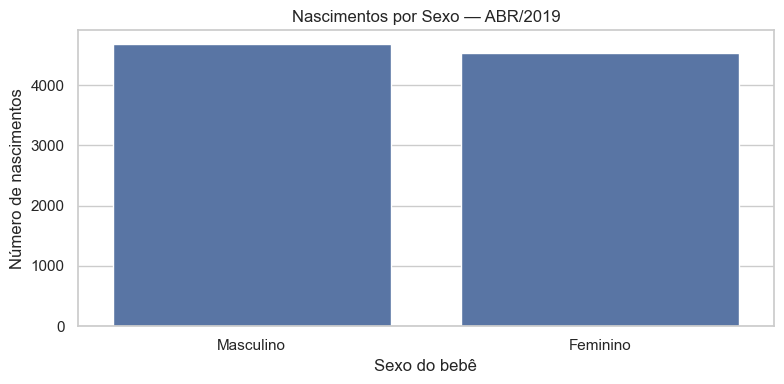

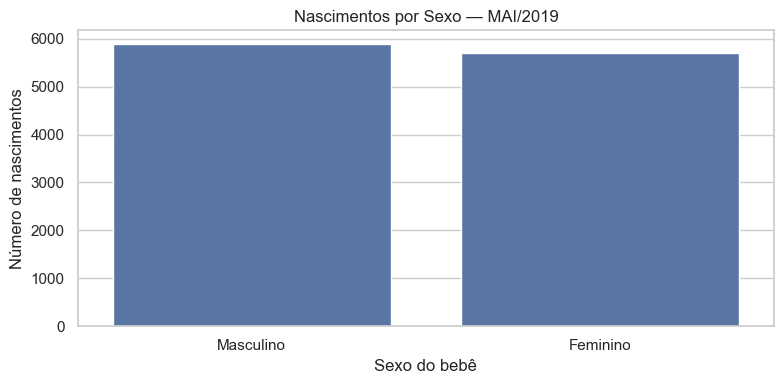

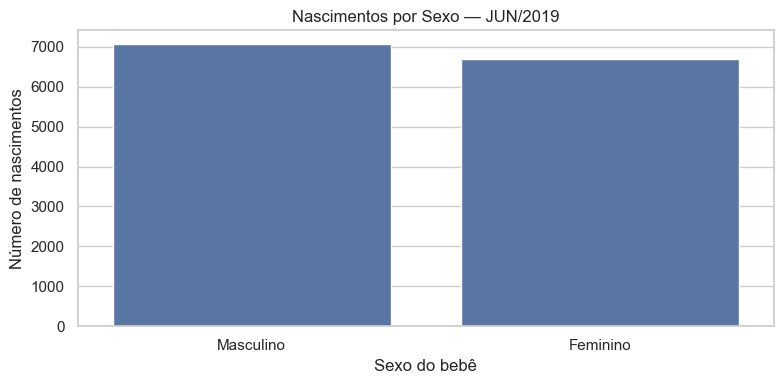

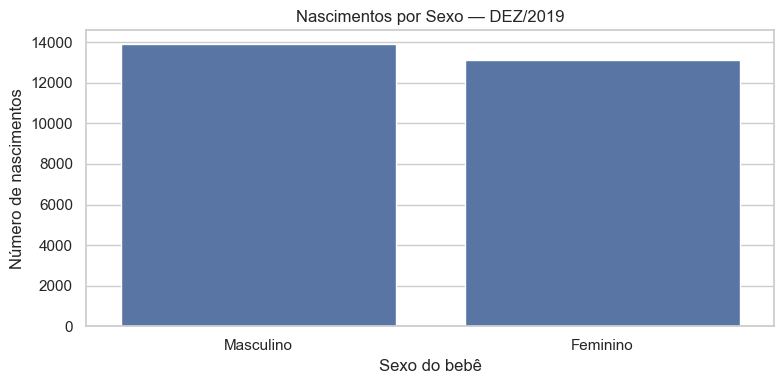

In [15]:
# Distribuição de peso dos bebês
for mes, df in bases.items():
    plt.figure()
    sns.histplot(df["PESO"], bins=30, kde=True)
    plt.title(f"Distribuição do Peso ao Nascer — {mes}/2019")
    plt.xlabel("Peso (gramas)")
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()

# Comparação de sexo
for mes, df in bases.items():
    plt.figure()
    sns.countplot(x=df["SEXO"])
    plt.title(f"Nascimentos por Sexo — {mes}/2019")
    plt.xlabel("Sexo do bebê")
    plt.ylabel("Número de nascimentos")
    plt.tight_layout()
    plt.show()

In [16]:
def gerar_graficos_sinasc(meses, caminho_base, nome_base="SINASC_RO_2019_", pasta_figuras="figuras"):
    """
    Lê automaticamente os arquivos CSV do SINASC e gera gráficos salvos em uma pasta.
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os

    sns.set(style="whitegrid")
    plt.rcParams["figure.figsize"] = (8, 4)
    
    pasta_figuras = os.path.join(caminho_base, pasta_figuras)
    os.makedirs(pasta_figuras, exist_ok=True)
    
    for mes in meses:
        arquivo = os.path.join(caminho_base, f"{nome_base}{mes}.csv")
        if os.path.exists(arquivo):
            df = pd.read_csv(arquivo, sep=',', encoding='latin1')
            df.columns = df.columns.str.upper().str.replace(" ", "")
            
            # Gráfico 1: Distribuição da Idade das Mães
            if "IDADEMAE" in df.columns:
                plt.figure()
                sns.histplot(df["IDADEMAE"], bins=20, kde=True)
                plt.title(f"Distribuição da Idade das Mães — {mes}/2019")
                plt.xlabel("Idade da Mãe")
                plt.ylabel("Frequência")
                plt.tight_layout()
                plt.savefig(os.path.join(pasta_figuras, f"grafico_{mes}_idade.png"))
                plt.close()
            
            # Gráfico 2: Peso ao nascer
            if "PESO" in df.columns:
                plt.figure()
                sns.histplot(df["PESO"], bins=30, kde=True)
                plt.title(f"Distribuição do Peso ao Nascer — {mes}/2019")
                plt.xlabel("Peso (gramas)")
                plt.ylabel("Frequência")
                plt.tight_layout()
                plt.savefig(os.path.join(pasta_figuras, f"grafico_{mes}_peso.png"))
                plt.close()
            
            # Gráfico 3: Nascimentos por sexo
            if "SEXO" in df.columns:
                plt.figure()
                sns.countplot(x=df["SEXO"])
                plt.title(f"Nascimentos por Sexo — {mes}/2019")
                plt.xlabel("Sexo do bebê")
                plt.ylabel("Número de nascimentos")
                plt.tight_layout()
                plt.savefig(os.path.join(pasta_figuras, f"grafico_{mes}_sexo.png"))
                plt.close()
            
            print(f"Gráficos de {mes} gerados e salvos com sucesso!")
        else:
            print(f"Arquivo {mes} não encontrado.")

In [19]:
# Caminho da sua pasta de dados
caminho_dados = r"C:\Users\brunn\OneDrive\Área de Trabalho\EBAC\input"

# Meses de interesse para gerar os gráficos
meses = ["MAR", "ABR", "MAI", "JUN", "DEZ"]

# Geração automática
gerar_graficos_sinasc(meses, caminho_dados)

Gráficos de MAR gerados e salvos com sucesso!
Gráficos de ABR gerados e salvos com sucesso!
Gráficos de MAI gerados e salvos com sucesso!
Gráficos de JUN gerados e salvos com sucesso!
Gráficos de DEZ gerados e salvos com sucesso!


## Conclusão e Automação

Com este script, conseguiautomatizar a geração de gráficos mensais a partir das bases do SINASC 2019.  
Com isso, basta adicionar novos arquivos (por exemplo, `SINASC_RO_2019_JUL.csv`, `SINASC_RO_2019_AGO.csv`) e executar a função `gerar_graficos_sinasc()` para gerar automaticamente todos os gráficos necessários.